# Question 1: Cryptography dicts [2 marks]

Rot13 is a very basic substitution cipher where each letter is replaced by the letter 13 away. a becomes n, b becomes o, c becomes p..... x becomes k, y becomes l and z becomes m.

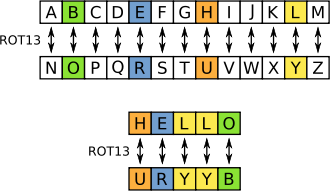

- Write a code that builds a dict that translates from a letter to the corresponding letter in ROT13 using list comprehension (see above diagram). The function chr() may be useful which translates numbers to letters using ASCII (https://en.wikipedia.org/wiki/ASCII). chr(97) = a, chr(98) = b... [1 mark]
- Translate the following passcode: ariretbaantvirlbhhcariretbaanyrglbhqbja using ROT13 [1 mark]

In [26]:
rot13= {chr(l + 65 + 6 * ((l + 1)//27)):((l + 13) % 26 + 65 + 32 * ((l + 1)//27)) for l in range(0, 52)};

# This defines the original string and it's encoded variant
string = "ariretbaantvirlbhhcariretbaanyrglbhqbja";
encodedString = "";

# This changes every character in the original string to the translated character, dependant on it's case
for character in string:
    encodedString = encodedString + chr(rot13[character]);

# Prints final 
print(encodedString)

nevergonnagiveyouupnevergonnaletyoudown


# Question 2 Fast Integration [3 marks]


- Numerically integrate the following function using an appropriate method and count the time taken (__Not using the built-in Python functions__). Ensure the computation takes < 1 millisecond. The analytical answer is not given but should be small (~ -0.001), you can use the `quad` function to check you get a consistent answer. Note that the argument of the sign includes an x to the power of x! [2 marks]

$$ \int_{0}^{1} x^2 \cdot\cos\left(100\pi x^x \right) \, dx $$

- Why did you use this method? What is the advantage/disadvantage? (Just write this out in a markdown cell block, 1 or 2 sentences explaining your choice.) [1 mark]


In [ ]:
import numpy as np;
import timeit;

def f(x):
    return np.multiply(np.power(x, 2), np.cos(np.multiply(np.multiply(100, np.pi), np.power(x, x))));

def integralApproximation(f, a, b, n):
    h = np.multiply(np.sum(b, -a), 1 / n);
    
    sumPoints = np.linspace(a, b, n);

    sumPoints = f(sumPoints);

    rectangleAreas = np.multiply(sumPoints, h);

    return np.sum(rectangleAreas);

timeFunction = lambda: integralApproximation(f, 0, 1, 10000);

output = timeFunction();

print("Output:" + str(output));

print("Time (ms):" + str(timeit.timeit(timeFunction, number = 1000)));

# This is the standard sum of rectangles area x * dx method
# This is simple and hence requires very little time to get an answer
# Due to it's simplicity however, it may be less accurate in a similar computation time on more complicated or eratic functions

Output:-0.000944388373132871
Time (ms):0.30742330000794027


# Question 3 Volume of 10-D sphere [2 marks]

- Calculate the volume of a sphere with radius 1 in ten dimensions. Hint: Worksheet 6 non-assessed problems may be helpful. [2 marks]

In [70]:
import numpy as np;
import time;

seed = time.time_ns();
rng = np.random.default_rng(seed);

def createRandomCoordinate(dimensionCount):
    return rng.random(dimensionCount);

def checkIfInSphere(coordinate, radius):
    total = 0;
    for scalar in coordinate:
        total += scalar**2;

    return (total <= radius**2)

# The number of dimensions
dimensionCount = 10;

# The length of each dimension in units
radius = 1;

# Number of points to be randomly generated and checked
numberOfPoints = 500000;

count = 0;

# Checks numberOfPoints number of points to find approximately how many are in the sphere
for i in range(0, numberOfPoints):
    if (checkIfInSphere(createRandomCoordinate(dimensionCount), radius)):
        count += 1;

# Calculates volume from count
volume = (2 * radius) ** dimensionCount * count / numberOfPoints;

print(volume);

2.582528


# Question 4 [3 marks]

Use SymPy to calculate the following:

* $$ \frac{d^2}{dx dy} e^{ax+y} \sin(2x+y) x $$

* $$ \int_{-b}^{b} dx \int_{-b}^{b} dy \, \, \, e^{-(x^2+y^2)/(2\sigma^2)} $$

* $$ \lim_{x \rightarrow 1} \frac{\sqrt[3]{x}-1}{\sqrt{x}-1} $$

In [71]:
from sympy import *;

x, y, a, b, sigma = symbols('x y a b sigma');

In [72]:
diff(diff(exp(a*x + y) * sin(2*x + y) * x, y), x)

a*x*exp(a*x + y)*sin(2*x + y) + a*x*exp(a*x + y)*cos(2*x + y) - 2*x*exp(a*x + y)*sin(2*x + y) + 2*x*exp(a*x + y)*cos(2*x + y) + exp(a*x + y)*sin(2*x + y) + exp(a*x + y)*cos(2*x + y)

In [73]:
integrate(integrate(exp(-(x**2 + y**2) / (2 * sigma**2)), (y, -b, b)), (x, -b, b))

2*pi*sigma**2*erf(sqrt(2)*b*sqrt(sigma**(-2))/2)**2

In [74]:
limit((x**(1/3) - 1) / (x**(1/2) - 1), x, 1)

2/3